In [3]:
import random

import arid
from PIL import ImageDraw, Image
from IPython.display import display
wps = arid.get_wps("/home/justin/Desktop/arid-dataset")


In [32]:
import json

wps = sorted(wps, key=lambda x: x.get_key())
print(len(wps))
cat_cnt = {}
for wp in wps:
    img_paths = wp.rgb_image_paths()
    for img_path in img_paths:
        title = wp.get_title()
        annotations = wp.get_annotations(img_path.stem)['annotations']
        _annotations = []
        for annotation in annotations:
            if annotation['id'] is not None:
                x = annotation['x']
                y = annotation['y']
                w = annotation['width']
                h = annotation['height']
                _annotations.append({
                    'id': annotation['id'],
                    'coords': [(x,y), (x+w, y), (x+w, y+h), (x,y+h)],
                    'score': 1.0,
                    'colormap': 'YlGn'
                })
                lbl = "_".join(annotation['id'].split('_')[:-1])
                if cat_cnt.get(lbl) is None:
                    cat_cnt[lbl] = 0
                cat_cnt[lbl] = cat_cnt[lbl] + 1
        
print(cats)
print(len(cats))

197
{'comb': 820, 'food_box': 1069, 'pliers': 960, 'shampoo': 1071, 'apple': 890, 'tomato': 354, 'potato': 689, 'stapler': 834, 'binder': 1247, 'marker': 1074, 'rubber_eraser': 977, 'cell_phone': 1043, 'cereal_box': 1039, 'garlic': 642, 'coffee_mug': 632, 'scissors': 917, 'keyboard': 1204, 'ball': 878, 'lime': 454, 'orange': 702, 'food_jar': 551, 'food_can': 590, 'greens': 764, 'plate': 688, 'sponge': 483, 'camera': 822, 'notebook': 1097, 'toothpaste': 724, 'flashlight': 933, 'kleenex': 662, 'calculator': 1033, 'bowl': 799, 'toothbrush': 470, 'hand_towel': 919, 'cap': 1072, 'food_bag': 728, 'peach': 609, 'pitcher': 838, 'bell_pepper': 765, 'pear': 721, 'mushroom': 697, 'soda_can': 682, 'water_bottle': 693, 'glue_stick': 583, 'lightbulb': 924, 'dry_battery': 735, 'instant_noodles': 705, 'food_cup': 563, 'banana': 659, 'lemon': 676, 'onion': 570}
51


51
{'tomato': 354, 'lime': 454, 'toothbrush': 470, 'sponge': 483, 'food_jar': 551, 'food_cup': 563, 'onion': 570, 'glue_stick': 583, 'food_can': 590, 'peach': 609, 'coffee_mug': 632, 'garlic': 642, 'banana': 659, 'kleenex': 662, 'lemon': 676, 'soda_can': 682, 'plate': 688, 'potato': 689, 'water_bottle': 693, 'mushroom': 697, 'orange': 702, 'instant_noodles': 705, 'pear': 721, 'toothpaste': 724, 'food_bag': 728, 'dry_battery': 735, 'greens': 764, 'bell_pepper': 765, 'bowl': 799, 'comb': 820, 'camera': 822, 'stapler': 834, 'pitcher': 838, 'ball': 878, 'apple': 890, 'scissors': 917, 'hand_towel': 919, 'lightbulb': 924, 'flashlight': 933, 'pliers': 960, 'rubber_eraser': 977, 'calculator': 1033, 'cereal_box': 1039, 'cell_phone': 1043, 'food_box': 1069, 'shampoo': 1071, 'cap': 1072, 'marker': 1074, 'notebook': 1097, 'keyboard': 1204, 'binder': 1247}
51


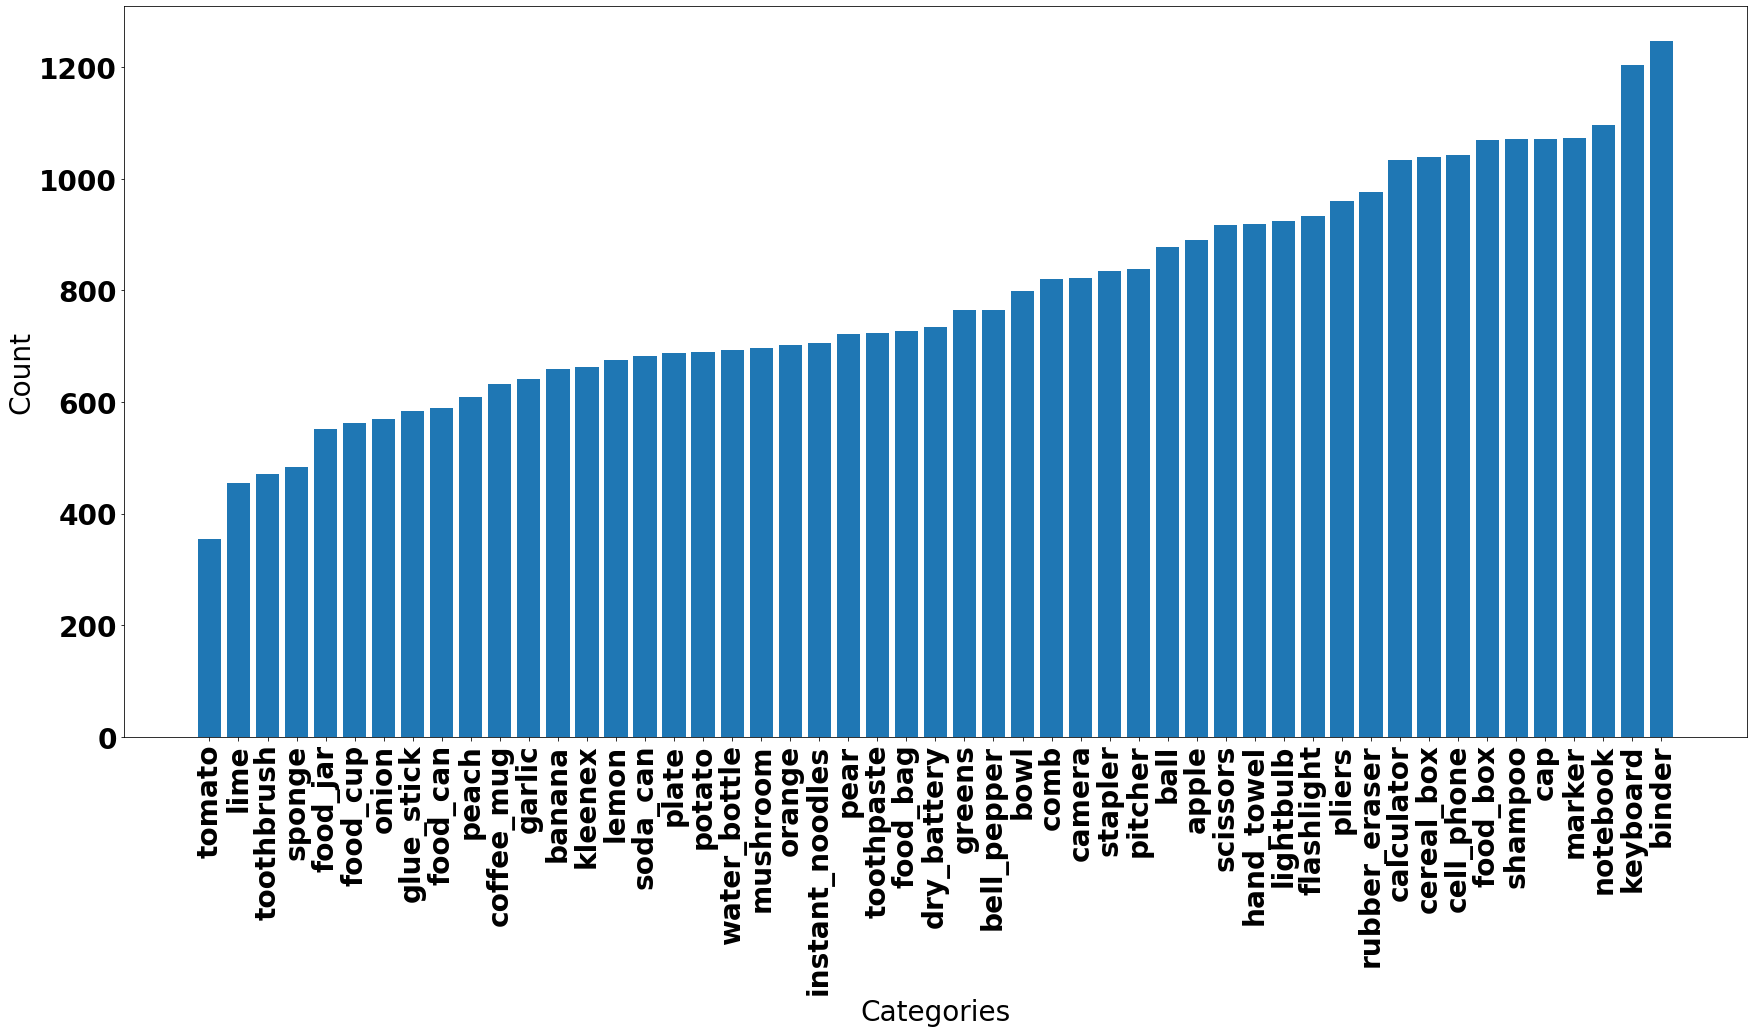

In [33]:
# OBJECT INSTANCE COUNT

print(len(cat_cnt.keys()))
_cat_cnt = sorted(cat_cnt.items(), key=lambda x: x[1])
cat_cnt = {}
for o, c in _cat_cnt:
    cat_cnt[o] = c
print(cat_cnt)
print(len(cat_cnt))



import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 28}

plt.rc('font', **font)

plt.bar(range(len(cat_cnt)), list(cat_cnt.values()), align='center')
plt.xticks(range(len(cat_cnt)), list(cat_cnt.keys()), rotation='vertical')
plt.ylabel('Count')
plt.xlabel('Categories');

plt.tight_layout()

#plt.show()
plt.savefig('object_instance_count.png')